In [21]:
    #uploading
    import numpy as np
    import pylab as pl
    import pandas as pd
    import datetime
    import csv
    import matplotlib.pyplot as plt
    import matplotlib.dates as mp
    import matplotlib.gridspec as gridspec
    import openpyxl
    import matplotlib.ticker as mticker
    import matplotlib as mplt

    #numbers need to be floats or integers to be plotted

In [ ]:
#We have our files. Here is the organization of what we have
#df_pm10__s has Madera's coarse pm 
#df_pm10s has Fresno's coarse pm
#select_time has Madera's aod and ae *
#select_time_f has Fresno's aod and ae *

In [4]:
#reading in csv
aod_fres_og='C:/Users/larterburn/Python Notebooks/Ploting_AOD/SNPP_Madera.csv'
aod_fres=pd.read_csv(aod_fres_og)

#reading in fresno
aod_fres_og_f='C:/Users/larterburn/Python Notebooks/Ploting_AOD/SNPP_Fresno.csv'
aod_fres_f=pd.read_csv(aod_fres_og_f)


In [5]:
#saving datetime #madera
aod_fres['Date']=pd.to_datetime(aod_fres.Date)

#Adding month column
aod_fres['month']=aod_fres.Date.dt.month


In [6]:
#fresno
#saving datetime
aod_fres_f['Date']=pd.to_datetime(aod_fres_f.Date)

#Adding month column
aod_fres_f['month']=aod_fres_f.Date.dt.month


In [8]:
#madera
#extracting October 20
select_time= aod_fres[(aod_fres['Date'] > '10-14-2019') & (aod_fres['Date'] < '12-01-2019')]

In [9]:
#fresno
#extracting October 20
select_time_f= aod_fres_f[(aod_fres_f['Date'] > '10-14-2019') & (aod_fres_f['Date'] < '12-01-2019')]

In [ ]:
#ALL CODE COARSE PM

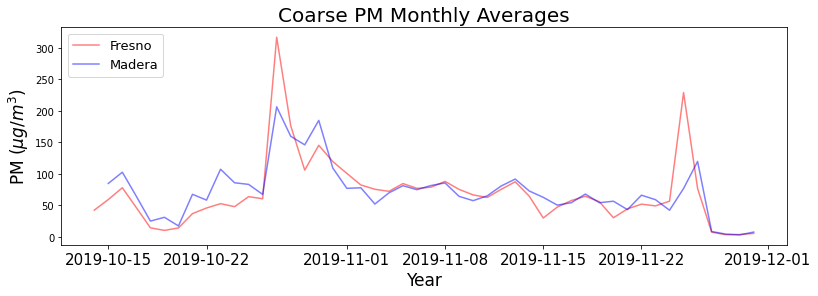

In [11]:
#fresno
#reading in csv
aqs_pm10='aqs_site_06-019-0011_81102.csv'
aqs_pm25='aqs_site_06-019-0011_88101.csv'

#saving csv file in a dataframe
df_pm10=pd.read_csv(aqs_pm10)
df_pm25=pd.read_csv(aqs_pm25)

df_pm10_x=pd.read_csv(aqs_pm10)
df_pm25_x=pd.read_csv(aqs_pm25)

#saving datetime
df_pm10['datetime_local']=pd.to_datetime(df_pm10.datetime_local)
df_pm25['datetime_local']=pd.to_datetime(df_pm25.datetime_local)

#making a year column
df_pm25['year']=df_pm25.datetime_local.dt.year 
df_pm10['year']=df_pm10.datetime_local.dt.year 

#making a month column
df_pm25['month']=df_pm25.datetime_local.dt.month 
df_pm10['month']=df_pm10.datetime_local.dt.month

#making a day column
df_pm25['day']=df_pm25.datetime_local.dt.day 
df_pm10['day']=df_pm10.datetime_local.dt.day

#making a date column
df_pm25['date']=df_pm25.datetime_local.dt.date 
df_pm10['date']=df_pm10.datetime_local.dt.date

#dropping NAs
df_pm10=df_pm10.dropna()
df_pm25=df_pm25.dropna()
#making coarse pm 
df_pm10['Coarse_PM']=df_pm10.sample_measurement-df_pm25.sample_measurement


#Filtering zeros
for cols in df_pm10.columns.tolist()[1:]:
    df_pm10['Coarse_PM'] = df_pm10.Coarse_PM[df_pm10['Coarse_PM'] > 0]
    
#select dates
df_pm10s=df_pm10[(df_pm10['datetime_local'] > '2019-10-14') & (df_pm10['datetime_local'] < '2019-12-01')]

#making them daily averages 
df_pm10s=df_pm10s.groupby('date').mean().reset_index()
#df_pm10__=df_pm10__s.groupby('date').mean().reset_index()


#madera
#reading in csv
aqs_pm10_='aqs_site_06-039-2010_81102.csv'
aqs_pm25_='aqs_site_06-039-2010_88101.csv'

#saving csv file in a dataframe
df_pm10_=pd.read_csv(aqs_pm10_)
df_pm25_=pd.read_csv(aqs_pm25_)

df_pm10__=pd.read_csv(aqs_pm10_)
df_pm25__=pd.read_csv(aqs_pm25_)

#saving datetime
df_pm10__['datetime_local']=pd.to_datetime(df_pm10__.datetime_local)
df_pm25__['datetime_local']=pd.to_datetime(df_pm25__.datetime_local)

#making a year column
df_pm25__['year']=df_pm25__.datetime_local.dt.year 
df_pm10__['year']=df_pm10__.datetime_local.dt.year 

#making a month column
df_pm25__['month']=df_pm25__.datetime_local.dt.month 
df_pm10__['month']=df_pm10__.datetime_local.dt.month

#making a day column
df_pm25__['day']=df_pm25__.datetime_local.dt.day 
df_pm10__['day']=df_pm10__.datetime_local.dt.day

#making a date column
df_pm25__['date']=df_pm25__.datetime_local.dt.date 
df_pm10__['date']=df_pm10__.datetime_local.dt.date

#dropping NAs
df_pm10__=df_pm10__.dropna()
df_pm25__=df_pm25__.dropna()
#making coarse pm 
df_pm10__['Coarse_PM']=df_pm10__.sample_measurement-df_pm25__.sample_measurement

#Filtering zeros
for cols in df_pm10__.columns.tolist()[1:]:
    df_pm10__['Coarse_PM'] = df_pm10__.Coarse_PM[df_pm10__['Coarse_PM'] > 0]
    
#select dates
df_pm10__s=df_pm10__[(df_pm10__['datetime_local'] > '2019-10-15') & (df_pm10__['datetime_local'] < '2019-12-01')]

#making them daily averages 
df_pm10__s=df_pm10__s.groupby('date').mean().reset_index()
df_pm10__=df_pm10__s.groupby('date').mean().reset_index()


#plot
#Coarse PM
fig, ax=plt.subplots(figsize=(13,4))
plt.plot(df_pm10s['date'], df_pm10s['Coarse_PM'], c='r', lw=1.5, label='Fresno', alpha=0.5)
plt.plot(df_pm10__s['date'], df_pm10__s['Coarse_PM'], c='b', lw=1.5, label='Madera', alpha=0.5)
plt.tick_params(axis='x', which='both', labelsize=15)
plt.tick_params(axis='y', which='both', labelsize=10)
plt.xlabel('Year', fontsize=17)
plt.ylabel('PM ($\mu g/m^3$)', fontsize=17)
plt.title("Coarse PM Monthly Averages", fontsize=20)
plt.legend(loc='upper left', fontsize=13) 
plt.show()


#use average command i been using to average everything up by mean for the day 


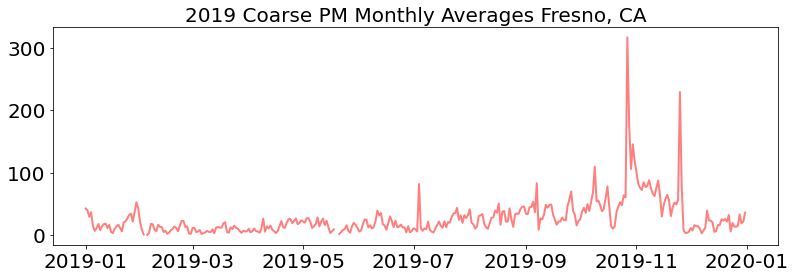

In [13]:
#just coarse pm for months of 2019
df_pm10_fresno_2019=df_pm10[df_pm10['datetime_local'].dt.year == 2019]
df_pm10_fresno_2019=df_pm10_fresno_2019.groupby('date').mean().reset_index()
df_pm10_fresno_2019

#plot
#Coarse PM
fig, ax=plt.subplots(figsize=(13,4))
plt.plot(df_pm10_fresno_2019['date'], df_pm10_fresno_2019['Coarse_PM'], c='r', lw=2, label='Fresno', alpha=0.5)
plt.tick_params(axis='x', which='both', labelsize=20)
plt.tick_params(axis='y', which='both', labelsize=20)
#plt.xlabel('Year', fontsize=17)
#plt.ylabel('PM ($\mu g/m^3$)', fontsize=17)
plt.title("2019 Coarse PM Monthly Averages Fresno, CA", fontsize=20)
#plt.legend(loc='upper left', fontsize=13) 
plt.show()

In [14]:
#we want the pm 2.5
#ALL CODE COARSE PM
#11-2
#fresno
#reading in csv
aqs_pm25_fres='aqs_site_06-019-0011_88101.csv'

#saving csv file in a dataframe
df_pm25_fres=pd.read_csv(aqs_pm25_fres)

df_pm25_xfres=pd.read_csv(aqs_pm25_fres)

#saving datetime
df_pm25_fres['datetime_local']=pd.to_datetime(df_pm25_fres.datetime_local)

#making a year column
df_pm25_fres['year']=df_pm25_fres.datetime_local.dt.year 

#making a month column
df_pm25_fres['month']=df_pm25_fres.datetime_local.dt.month 

#making a day column
df_pm25_fres['day']=df_pm25_fres.datetime_local.dt.day 

#making a date column
df_pm25_fres['date']=df_pm25_fres.datetime_local.dt.date 

#dropping NAs
df_pm25_fres=df_pm25_fres.dropna()

#Filtering zeros
for cols in df_pm25_fres.columns.tolist()[1:]:
    df_pm25_fres['sample_measurement'] = df_pm25_fres.sample_measurement[df_pm25_fres['sample_measurement'] > 0]
    
df_pm25_fres['hour'] = df_pm25_fres['datetime_local'].dt.strftime('%H')
df_pm25_fres['hour'] = df_pm25_fres['hour'].astype('object')
    
#select dates
date_edit_fres=df_pm25_fres[(df_pm25_fres['datetime_local'] > '2019-10-14') & (df_pm25_fres['datetime_local'] < '2019-12-01')]

time_edit_fres = date_edit_fres[date_edit_fres['hour'].isin(['11', '12', '13', '14'])]

#making them daily averages 
time_edit_fres=time_edit_fres.groupby('date').mean().reset_index()

#dropping a row 
time_edit_fres=time_edit_fres.drop([0])


In [15]:
#dropping a row for fresno coarse pm
date_edit_fres__=date_edit_fres.groupby('date').mean().reset_index()
date_edit_fres__=date_edit_fres__.drop([0])


In [17]:
#we want the pm 2.5
#11-2
#madera

#reading in csv
aqs_pm25_mad='aqs_site_06-039-2010_88101.csv'

#saving csv file in a dataframe
df_pm25_mad=pd.read_csv(aqs_pm25_mad)

df_pm25_xmad=pd.read_csv(aqs_pm25_mad)

#saving datetime
df_pm25_mad['datetime_local']=pd.to_datetime(df_pm25_mad.datetime_local)

#selecting times


#making a year column
df_pm25_mad['year']=df_pm25_mad.datetime_local.dt.year 

#making a month column
df_pm25_mad['month']=df_pm25_mad.datetime_local.dt.month 

#making a day column
df_pm25_mad['day']=df_pm25_mad.datetime_local.dt.day 

#making a date column
df_pm25_mad['date']=df_pm25_mad.datetime_local.dt.date 


#making a time column
df_pm25_mad['time']=df_pm25_mad.datetime_local.dt.time

#dropping NAs
df_pm25_mad=df_pm25_mad.dropna()

#Filtering zeros
for cols in df_pm25_mad.columns.tolist()[1:]:
    df_pm25_mad['sample_measurement'] = df_pm25_mad.sample_measurement[df_pm25_mad['sample_measurement'] > 0]

df_pm25_mad['hour'] = df_pm25_mad['datetime_local'].dt.strftime('%H')
df_pm25_mad['hour'] = df_pm25_mad['hour'].astype('object')
    
#select dates
date_edit_mad=df_pm25_mad[(df_pm25_mad['datetime_local'] > '2019-10-14') & (df_pm25_mad['datetime_local'] < '2019-12-01')]

time_edit_mad = date_edit_mad[date_edit_mad['hour'].isin(['11', '12', '13', '14'])]

#making them daily averages 
time_edit_mad=time_edit_mad.groupby('date').mean().reset_index()

#dropping a row 
time_edit_mad=time_edit_mad.drop([0])


In [18]:
#making dailies from pm2.5 madera
df_pm25_mad_daily=df_pm25_mad[(df_pm25_mad['datetime_local'] > '2019-10-14') & (df_pm25_mad['datetime_local'] < '2019-12-01')].reset_index()
df_pm25_mad_daily=df_pm25_mad_daily.groupby('date').mean().reset_index()


In [19]:
#making dailies from pm2.5 fresno
df_pm25_fres_daily=df_pm25_fres[(df_pm25_fres['datetime_local'] > '2019-10-14') & (df_pm25_fres['datetime_local'] < '2019-12-01')].reset_index()
df_pm25_fres_daily=df_pm25_fres_daily.groupby('date').mean().reset_index()

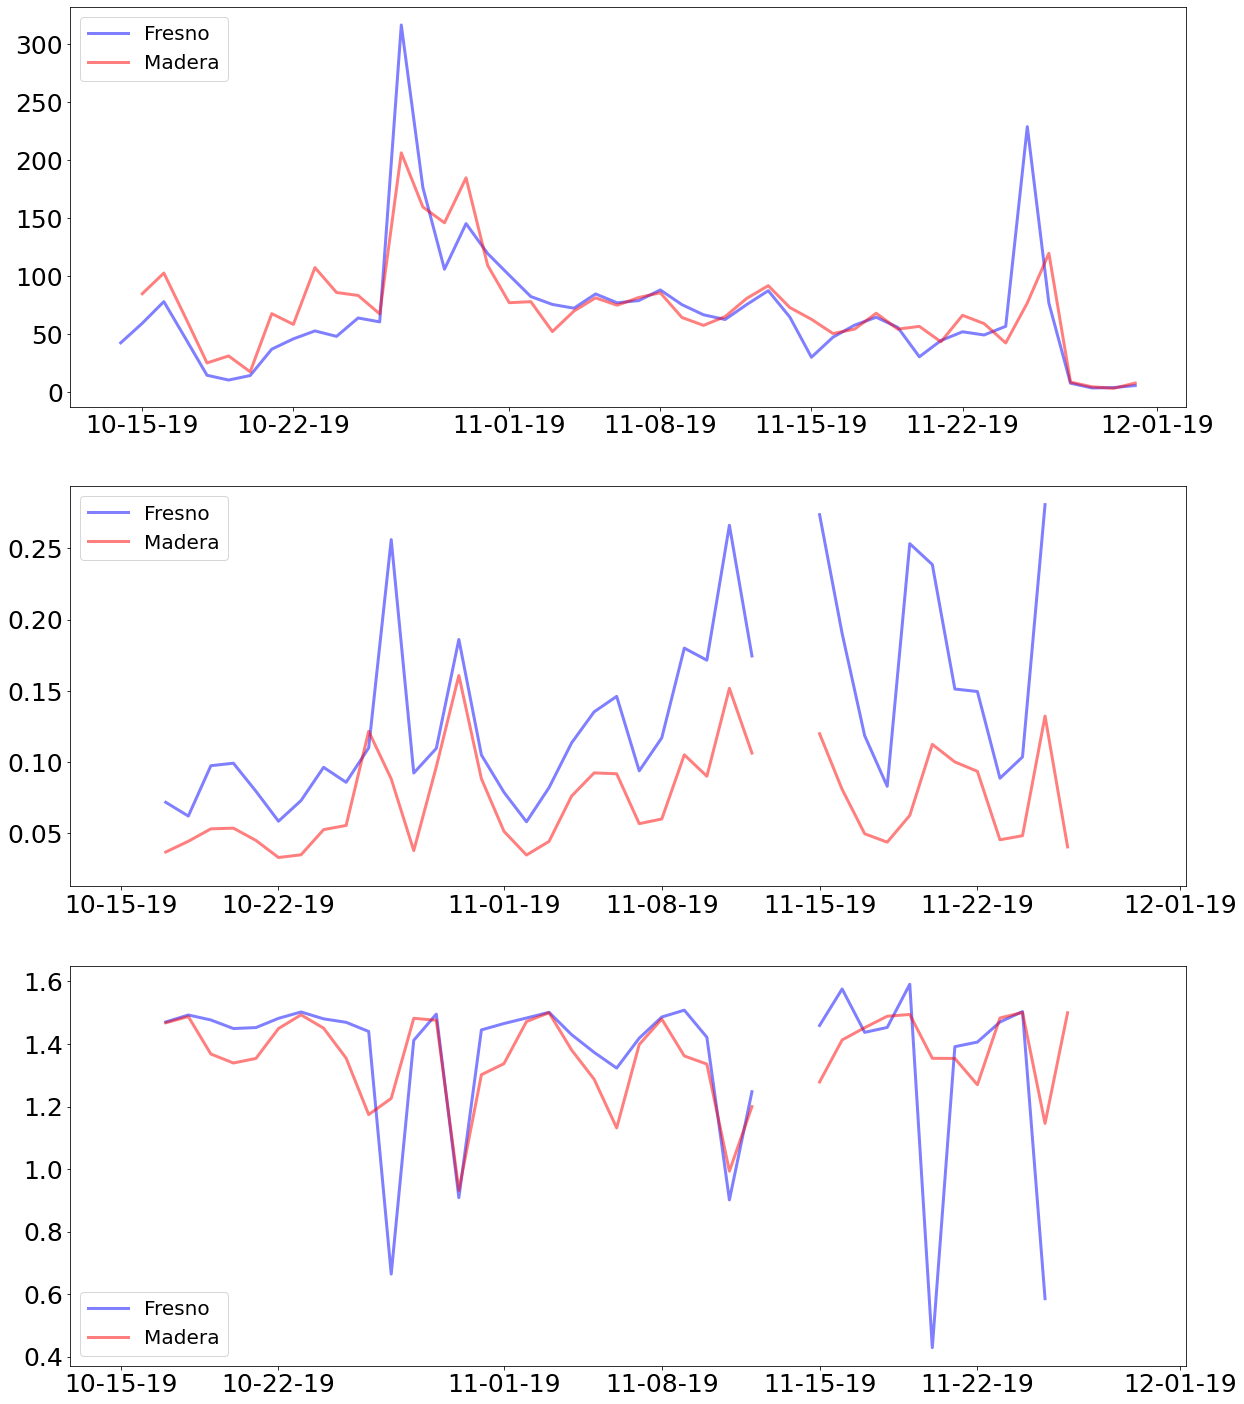

In [20]:
#Plotting all three
#old data that is now in the poster

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20,25))
axs[0].plot(df_pm10s['date'], df_pm10s['Coarse_PM'], c='b', lw=3, label='Fresno', alpha=0.5)
axs[0].plot(df_pm10__s['date'], df_pm10__s['Coarse_PM'], c='r', lw=3, label='Madera', alpha=0.5)
#axs[0].fill_between(df_pm10_['datetime_local'], df_pm10_['25%'],df_pm10_['75%'],alpha=.5, label='25th and 75th daily percentile',color='r')
axs[0].tick_params(axis='x', which='both', labelsize=25)
axs[0].tick_params(axis='y', which='both', labelsize=25)
axs[0].xaxis.set_major_formatter(mp.DateFormatter("%m-%d-%y"))
#axs[1].set_xlabel('Date', fontsize=20)
#axs[1].set_ylabel('AOD', fontsize=25)
#axs[0].set_title("Coarse PM", fontsize=28)
axs[0].legend(loc='upper left', fontsize=20) 

axs[1].plot(select_time_f['Date'], select_time_f['AOD 550nm'],lw=3, label='Fresno', alpha=0.5, color='b')
axs[1].plot(select_time['Date'], select_time['AOD 550nm'], c='r', lw=3, label='Madera', alpha=0.5)
axs[1].tick_params(axis='x', which='both', labelsize=25)
axs[1].tick_params(axis='y', which='both', labelsize=25)
axs[1].xaxis.set_major_formatter(mp.DateFormatter("%m-%d-%y"))
#axs[1].set_xlabel('Date', fontsize=20)
#axs[1].set_ylabel('AOD', fontsize=25)
#axs[1].set_title("AOD", fontsize=28)
axs[1].legend(loc='upper left', fontsize=20)  

axs[2].plot(select_time_f['Date'], select_time_f['Angstrom Exponent'],lw=3, label='Fresno', alpha=.5, color='b')
axs[2].plot(select_time['Date'], select_time['Angstrom Exponent'], c='r', lw=3, label='Madera', alpha=.5)
axs[2].tick_params(axis='x', which='both', labelsize=25)
axs[2].tick_params(axis='y', which='both', labelsize=25)
axs[2].xaxis.set_major_formatter(mp.DateFormatter("%m-%d-%y"))
#axs[2].set_xlabel('Date', fontsize=22)
#axs[2].set_ylabel('Angstrom exponent', fontsize=25)
#axs[2].set_title("Angstrom Exponent", fontsize=28)
axs[2].legend(loc='lower left', fontsize=20) 


In [17]:
###########################################################################################################################

In [ ]:
#Reminder:
#We have our files. Here is the organization of what we have
#df_pm10__s has Madera's coarse pm and pm10
#df_pm10s has Fresno's coarse pm and pm10
#select_time has Madera's aod and ae
#select_time_f has Fresno's aod and ae

#Madera:
    #Aod and Ae madera is in select_time. The coarse pm is in df_pm10__s
    #Pm2.5 (11-2) is in time_edit_fres
    #Pm2.5 daily values is 
#Fresno: 
    #Aod and Ae Fresno is in select_time_f. The coarse pm is in df_pm10s
    #Pm2.5 (11-2) is in time_edit_fres
    #Pm2.5 daily values is 

In [ ]:
#doing some final things to plot
df_pm10_fres_daily=df_pm10__s.groupby('date').mean().reset_index()

Text(0.5, 1.0, 'CPM, AOD, & AE for Fresno')

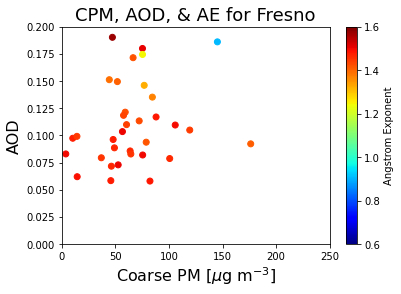

In [30]:
#Fresno
df_pm10s=df_pm10s.drop([0])
cs=plt.scatter(df_pm10s["Coarse_PM"],select_time_f["AOD 550nm"],c=select_time_f["Angstrom Exponent"],cmap='jet')
cbar = plt.colorbar(cs)
cbar.set_label('Angstrom Exponent')
plt.xlabel('Coarse PM [$\mu$g m$^{-3}$]',fontsize=16) 
plt.clim(0.6,1.6)
plt.xlim(0,250)
plt.ylim(0,0.2)
plt.ylabel('AOD',fontsize=16) 
plt.title('CPM, AOD, & AE for Fresno',fontsize=18) 

Text(0.5, 1.0, 'CPM, AOD, & AE for Madera')

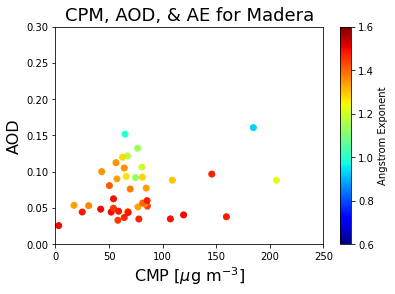

In [26]:
#Madera
cs=plt.scatter(df_pm10__s["Coarse_PM"],select_time["AOD 550nm"],c=select_time["Angstrom Exponent"],cmap='jet')
cbar = plt.colorbar(cs)
cbar.set_label('Angstrom Exponent')
plt.xlabel('CMP [$\mu$g m$^{-3}$]',fontsize=16) 
plt.clim(0.6,1.6)
plt.xlim(0,250)
plt.ylim(0,0.3)
plt.ylabel('AOD',fontsize=16) 
plt.title('CPM, AOD, & AE for Madera',fontsize=18) 

Text(0.5, 1.0, 'PM2.5, AOD, & AE for Fresno')

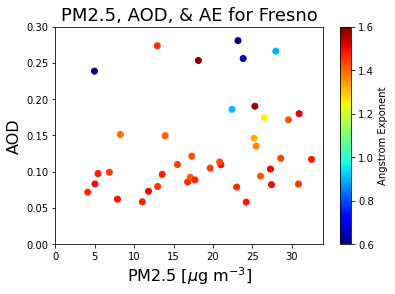

In [27]:
#Fresno PM2.5
cs=plt.scatter(date_edit_fres__["sample_measurement"],select_time_f["AOD 550nm"],c=select_time_f["Angstrom Exponent"],cmap='jet')
cbar = plt.colorbar(cs)
cbar.set_label('Angstrom Exponent')
plt.xlabel('PM2.5 [$\mu$g m$^{-3}$]',fontsize=16) 
plt.clim(0.6,1.6)
plt.xlim(0,34)
plt.ylim(0,0.3)
plt.ylabel('AOD',fontsize=16) 
plt.title('PM2.5, AOD, & AE for Fresno',fontsize=18) 

Text(0.5, 1.0, 'PM2.5, AOD, & AE for Madera')

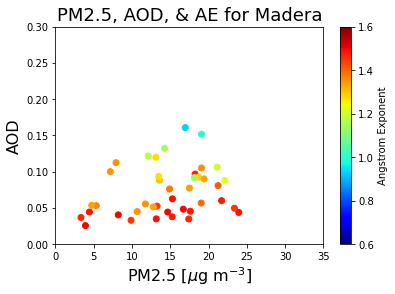

In [108]:
#Madera PM2.5
cs=plt.scatter(date_edit_mad__['sample_measurement'],select_time["AOD 550nm"],c=select_time["Angstrom Exponent"],cmap='jet')
cbar = plt.colorbar(cs)
cbar.set_label('Angstrom Exponent')
plt.xlabel('PM2.5 [$\mu$g m$^{-3}$]',fontsize=16) 
plt.clim(0.6,1.6)
plt.xlim(0,35)
plt.ylim(0,0.3)
plt.ylabel('AOD',fontsize=16) 
plt.title('PM2.5, AOD, & AE for Madera',fontsize=18) 